# Housing Price Prediction – Modeling
This notebook builds regression models using the preprocessed housing dataset to predict log-transformed housing prices. 
It follows the modeling portion of the project, focusing on applying multiple algorithms and tuning them.

### 1) Imports and Setup
We start by importing essential libraries for data manipulation, visualization, and modeling.  
This includes pandas and NumPy for data handling, matplotlib and seaborn for visualization,  
and scikit-learn modules for preprocessing, model building, and evaluation.


In [14]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 2) Load Preprocessed Data
The preprocessed dataset is loaded from the previous stage.  
This version already includes cleaned, encoded, and transformed variables ready for modeling.


In [15]:
# Load Preprocessed Data
df = pd.read_csv('../new_data_archive/processed_housing.csv')
df.head()

,id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sale_month,was_renovated,effective_age,price_log,sqft_living_log,sqft_lot_log,sqft_living15_log
0,7229300521,2,1.00,1.0,0,0,3,7,98178,10,0,59,12.351475,7.074117,8.639588,7.201171
1,6414100192,3,2.25,2.0,0,0,3,7,98125,12,1,23,13.195616,7.852050,8.887791,7.433075
2,5631500400,2,1.00,1.0,0,0,3,6,98028,2,0,82,12.100718,6.647688,9.210440,7.908755
3,2487200875,4,3.00,1.0,0,0,5,7,98136,12,0,49,13.311331,7.581210,8.517393,7.215975
4,1954400510,3,2.00,1.0,0,0,3,8,98074,2,0,28,13.142168,7.427144,8.997271,7.496097


### 3) Define Target and Features
We define our feature matrix `X` (independent variables) and target vector `y` (log-transformed house price).  
An 80/20 train-test split is used to train models on most of the data and reserve a portion for evaluation.


In [16]:
# Define Target and Features
X = df.drop('price_log', axis=1)
y = df['price_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4) Preprocessing Setup
We define which columns need scaling, which are binary, and which to drop.  
- **Scaled features** are continuous or ordinal variables.  
- **Binary features** (like `waterfront` and `was_renovated`) are passed through unchanged.  
- **Zipcode** is excluded since it has too many unique values to encode effectively.


In [17]:
# Preprocessing Setup
scale_features = [
    'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade',
    'sale_month', 'effective_age',
    'sqft_living_log', 'sqft_lot_log', 'sqft_living15_log'
]

# Binary features 
binary_features = ['waterfront', 'was_renovated']

# Drop zipcode
categorical_features = []  

### 5) Column Transformer
We use a `ColumnTransformer` to apply preprocessing steps consistently across all models.  
It standardizes numeric features and passes binary features through without modification.


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scale_features),
        ('bin', 'passthrough', binary_features)
    ]
)

### 6) Gradient Boosting Regressor
We begin with a Gradient Boosting model to capture complex non-linear relationships.  
The pipeline applies preprocessing, fits the model, and evaluates it using MAE, RMSE, and R².


In [19]:
# Gradient Boosting Regressor - Khushi

from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print(f"MAE: {mae_gb:.3f}")
print(f"RMSE: {rmse_gb:.3f}")
print(f"R²: {r2_gb:.3f}")

Gradient Boosting Results:
MAE: 0.235
RMSE: 0.295
R²: 0.689


### 7) Linear Regression
We fit a simple linear regression model as a baseline.  
This helps measure how much improvement tree-based and ensemble models provide over a basic linear fit.


In [20]:
# Linear Regression Part- Sangit

from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MAE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R²: {r2_lr:.3f}")

Linear Regression Results:
MAE: 0.249
RMSE: 0.313
R²: 0.649


/Users/sangeetgaire/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sangeetgaire/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sangeetgaire/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### 8) Decision Tree Regressor
We train a decision tree model, which can capture non-linear patterns but may overfit the data.  
Its results will be compared to both linear and ensemble models.


In [21]:
# Decision Tree model - Rose
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps = [('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state = 42))])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"MAE: {mae_dt:.3f}")
print(f"RMSE: {rmse_dt:.3f}")
print(f"R²: {r2_dt:.3f}")

Decision Tree Results:
MAE: 0.306
RMSE: 0.403
R²: 0.418


### 9) Model Comparison
We summarize and compare the results of all three models (Linear Regression, Decision Tree, and Gradient Boosting) using MAE, RMSE, and R² to identify the best-performing approach before tuning.


In [22]:
results_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Linear Regression', 'Decision Tree'],
    'MAE': [mae_gb, mae_lr, mae_dt],
    'RMSE': [rmse_gb, rmse_lr, rmse_dt],
    'R²': [r2_gb, r2_lr, r2_dt]
})

results_df

,Model,MAE,RMSE,R²
0,Gradient Boosting,0.234503,0.294809,0.688958
1,Linear Regression,0.249493,0.313021,0.649340
2,Decision Tree,0.305781,0.403301,0.417903


### 10) Hyperparameter Tuning (Gradient Boosting)
We perform a grid search with 5-fold cross-validation to optimize Gradient Boosting parameters, including the number of estimators, learning rate, tree depth, and subsample ratio.


In [23]:
# Hyperparameter Tuning (Gradient Boosting)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated R²:", grid.best_score_)


Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best Cross-Validated R²: 0.7175419411629588


### 11) Retrain Tuned Gradient Boosting Model
After identifying the best parameters, we retrain the Gradient Boosting model on the full training data.  
We then evaluate its final performance on the test set to verify improvements.


In [24]:
# Retrain Best Gradient Boosting Model with Tuned Parameters

best_gb = grid.best_estimator_
best_gb.fit(X_train, y_train)

# Evaluate on test data
y_pred_best = best_gb.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Performance of Tuned Gradient Boosting Model:")
print(f"MAE: {mae_best:.3f}")
print(f"RMSE: {rmse_best:.3f}")
print(f"R²: {r2_best:.3f}")

Performance of Tuned Gradient Boosting Model:
MAE: 0.223
RMSE: 0.284
R²: 0.711


In [25]:
import joblib

# Save the tuned and trained Gradient Boosting model
joblib.dump(best_gb, 'final_gradient_boosting_model.pkl')
print("Trained Gradient Boosting pipeline saved successfully as final_gradient_boosting_model.pkl")


Trained Gradient Boosting pipeline saved successfully as final_gradient_boosting_model.pkl


### 12) Feature Importance
We extract and visualize the top predictors of housing prices from the tuned Gradient Boosting model.  
This helps interpret which features have the greatest influence on price.


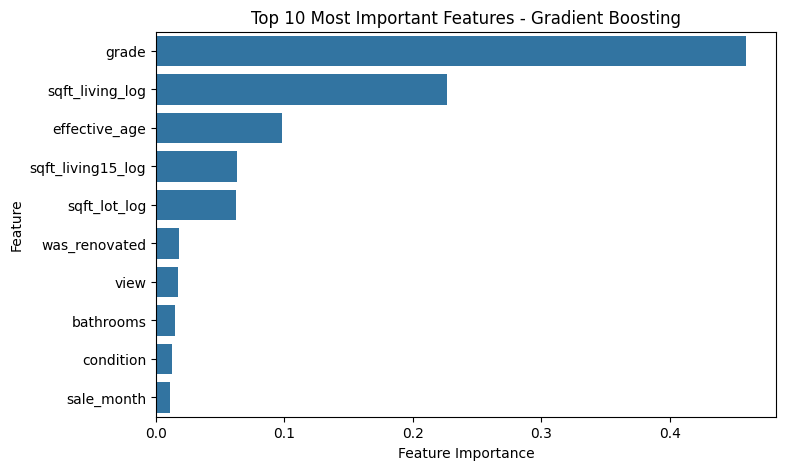

In [26]:
# Feature Importance (for Tuned Gradient Boosting)

best_gb_model = best_gb.named_steps['model']
best_gb_model.fit(preprocessor.fit_transform(X_train), y_train)

importances = best_gb_model.feature_importances_

# Combine scaled + binary feature names
feature_names = scale_features + binary_features

# Create feature importance DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False).head(10)

# Plot top features
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Top 10 Most Important Features - Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Modeling Summary

We trained and compared three machine learning models — **Linear Regression**, **Decision Tree**, and **Gradient Boosting** — to predict log-transformed housing prices using the processed dataset.

## Model Results
| Model | MAE | RMSE | R² |
|--------|------|------|------|
| Linear Regression | 0.249 | 0.313 | 0.649 |
| Decision Tree | 0.306 | 0.403 | 0.418 |
| Gradient Boosting (Before Tuning) | 0.235 | 0.295 | 0.689 |
| **Tuned Gradient Boosting (Final Model)** | **0.223** | **0.284** | **0.711** |

---

## Discussion
- **Linear Regression** performed as a simple baseline but struggled to capture the nonlinear relationships in housing prices, achieving moderate predictive power (R² = 0.649).  
- **Decision Tree** provided interpretability but showed weaker generalization and signs of overfitting, resulting in lower performance (R² = 0.418).  
- **Gradient Boosting** improved prediction accuracy significantly, learning complex feature interactions and achieving stronger performance (R² = 0.689).  
- After **hyperparameter tuning**, the **Tuned Gradient Boosting Model** achieved the **best overall performance (R² = 0.711)**, with lower error values (MAE = 0.223, RMSE = 0.284).  

These results confirm that ensemble methods like Gradient Boosting outperform simpler models when the relationships between predictors and the target variable are nonlinear and involve interaction effects.

The Gradient Boosting model identified **grade**, **sqft_living_log**, and **effective_age** as the most important predictors of housing prices.  

- **Grade** was the most influential factor, showing that higher construction quality and design have the strongest impact on price.  
- **sqft_living_log** (interior living area) followed as a key predictor, emphasizing that larger living spaces are highly correlated with higher prices.  
- **Effective_age** contributed significantly, suggesting that newer or recently renovated homes tend to have higher values.  
- Additional influential variables included **sqft_lot_log**, **sqft_living15_log**, **was_renovated**, and **view**, reflecting the role of property condition and neighborhood characteristics.

---

## Conclusion
The **Tuned Gradient Boosting model** is selected as the final model for evaluation and potential deployment, providing the best balance between **accuracy**, **generalization**, and **interpretability** for predicting housing prices.

